#<a href="https://competitions.codalab.org/competitions/15587?secret_key=135de508-0697-4c8a-8811-a611ee9ac039">Cyan Team - Age prediction from a single image</a>

<i> Brought to you by Cyan team</i>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction

The Lothlorian dataset is binary classification data set, which detects the user age being over or under age 18.

- lothlorian_train.data - a file in format libswm, which contains the features extracted from each image in the WIKI-IMDB dataset. We used a pre trained CNN to extract 4096 features for each of the (nr_of_images) images.
- lothlorian_feat.name - a file of feature names.
- lothlorian_label.name - a file of label names (0 or 1).
- lothlorian_train.solution - a file with 2 columns, which contains the class of each input image ( minor or major)
- lothlorian_test.data - a file in format libswm for testing.

In [1]:
codedir = 'sample_code/'                        # codedir = le répertoire dans lequel se trouve le code
from sys import path; path.append(codedir)
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set() #http://seaborn.pydata.org/ - Seaborn is a Python visualization library based on matplotlib.

## Fetch the data and load it

In [2]:
datadir = 'public_data/'                        # datadir = le répertoire dans lequel se trouve les datasets
dataname = 'lothlorian'
basename = datadir  + dataname
#!ls $basename*

In [3]:
import data_io
reload(data_io)
data = data_io.read_as_df(basename)                          # The data are loaded as a Pandas Data Frame
#data.to_csv(basename + '_train.csv', index=False)           # This allows saving the data in csv format

Reading public_data/lothlorian_train from AutoML format
Number of examples = 17724
Number of features = 4096
Number of classes = 2


In [4]:
print 'Voici les données brutes sous forme de tableau'
data

Voici les données brutes sous forme de tableau


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,1.268251,0.0,2.106965,0,0,0.000000,0.0,10.603186,8.476866,0.000000,...,0.000000,0,0,0.000000,4.096412,0.000000,2.956319,0.000000,0.0,1
1,0.000000,0.0,0.000000,0,0,0.000000,0.0,0.000000,5.064308,0.000000,...,11.635319,0,0,21.763811,14.241759,0.000000,0.563878,0.000000,0.0,1
2,0.000000,0.0,0.000000,0,0,2.870368,0.0,0.000000,0.000000,0.000000,...,10.478777,0,0,0.000000,0.000000,4.432796,7.262613,0.000000,0.0,0
3,0.000000,0.0,4.973673,0,0,2.701038,0.0,1.756998,0.000000,0.000000,...,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
4,0.000000,0.0,0.418692,0,0,0.000000,0.0,0.000000,0.000000,0.000000,...,41.546066,0,0,5.577128,2.721869,2.348195,0.000000,0.000000,0.0,0
5,0.000000,0.0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,5.939459,...,0.000000,0,0,1.054514,5.288167,0.000000,0.000000,15.234049,0.0,1
6,1.206813,0.0,0.000000,0,0,0.000000,0.0,0.000000,39.573280,0.000000,...,10.031336,0,0,0.000000,0.000000,0.000000,0.000000,11.231236,0.0,1
7,0.000000,0.0,0.000000,0,0,18.322508,0.0,4.506371,12.011034,0.000000,...,1.886922,0,0,12.629423,0.000000,0.000000,0.000000,12.716043,0.0,0
8,0.000000,0.0,0.000000,0,0,11.089288,0.0,0.000000,8.729891,0.000000,...,0.000000,0,0,11.072525,0.000000,0.000000,10.463823,11.651628,0.0,0
9,0.000000,0.0,1.927918,0,0,6.540280,0.0,3.537282,7.310216,2.856872,...,6.165920,0,0,6.696880,0.000000,0.000000,2.490824,2.709070,0.0,0


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
count,17724.000000,17724.0,17724.000000,17724.0,17724.0,17724.000000,17724.0,17724.000000,17724.000000,17724.000000,...,17724.000000,17724.0,17724.0,17724.000000,17724.000000,17724.000000,17724.000000,17724.000000,17724.0,17724.000000
mean,0.507281,0.0,4.211270,0.0,0.0,3.870780,0.0,5.027073,4.468565,1.570928,...,14.196806,0.0,0.0,5.959424,7.294247,2.594675,3.084003,6.917338,0.0,0.564489
std,0.912516,0.0,7.833106,0.0,0.0,7.875163,0.0,9.537904,8.760607,4.761275,...,13.623651,0.0,0.0,10.270545,12.188976,7.214320,5.894969,11.321452,0.0,0.495838
min,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.297242,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,11.861785,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.695036,0.0,5.620453,0.0,0.0,4.070446,0.0,6.419878,5.386473,0.000000,...,22.499348,0.0,0.0,8.999274,11.057065,0.000000,3.880413,10.506353,0.0,1.000000
max,7.838392,0.0,59.143669,0.0,0.0,62.545124,0.0,87.302124,95.644180,61.088356,...,87.668259,0.0,0.0,85.350090,91.528587,72.522858,51.954559,97.367935,0.0,1.000000


Is the dataset balanced ?


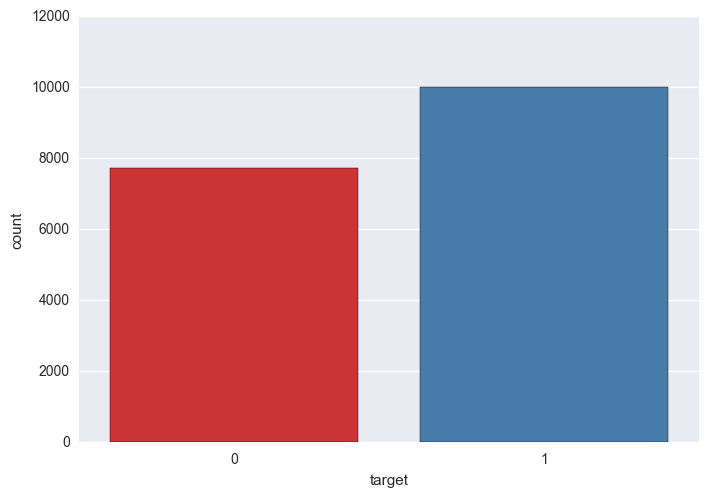

In [6]:
print 'Is the dataset balanced ?'

sns.set(style="darkgrid")
sns.countplot(x="target", data=data, palette="Set1")

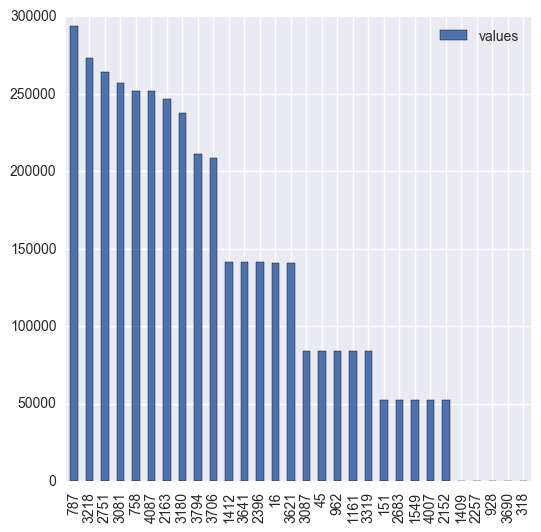

In [4]:
data = pd.DataFrame(data)
features = pd.DataFrame(data.sum())
features.columns = ['values']

featuresSorted = features.sort_values('values', ascending=False)
#print "dimensions du tableau featuresSorted :", featuresSorted.shape
#print featuresSorted

#print 'Features are ranging from ' + str(data.min().min()) +' to ' + str(data.max().max())
#print 'Are there any features having no values ?, Should you remove them ?'
#print 'Differences between some features:'

#Modify the line below to see the visualization of other features ?
featuresSorted = pd.concat([featuresSorted[0:10], featuresSorted[150:155], featuresSorted[1000:1005], featuresSorted[2000:2005], featuresSorted[3000:3005]])
featuresSorted.plot(kind='bar', figsize=(6,6))


Top 6 of Good Features: [556, 1857, 2658, 2662, 2739, 3043]


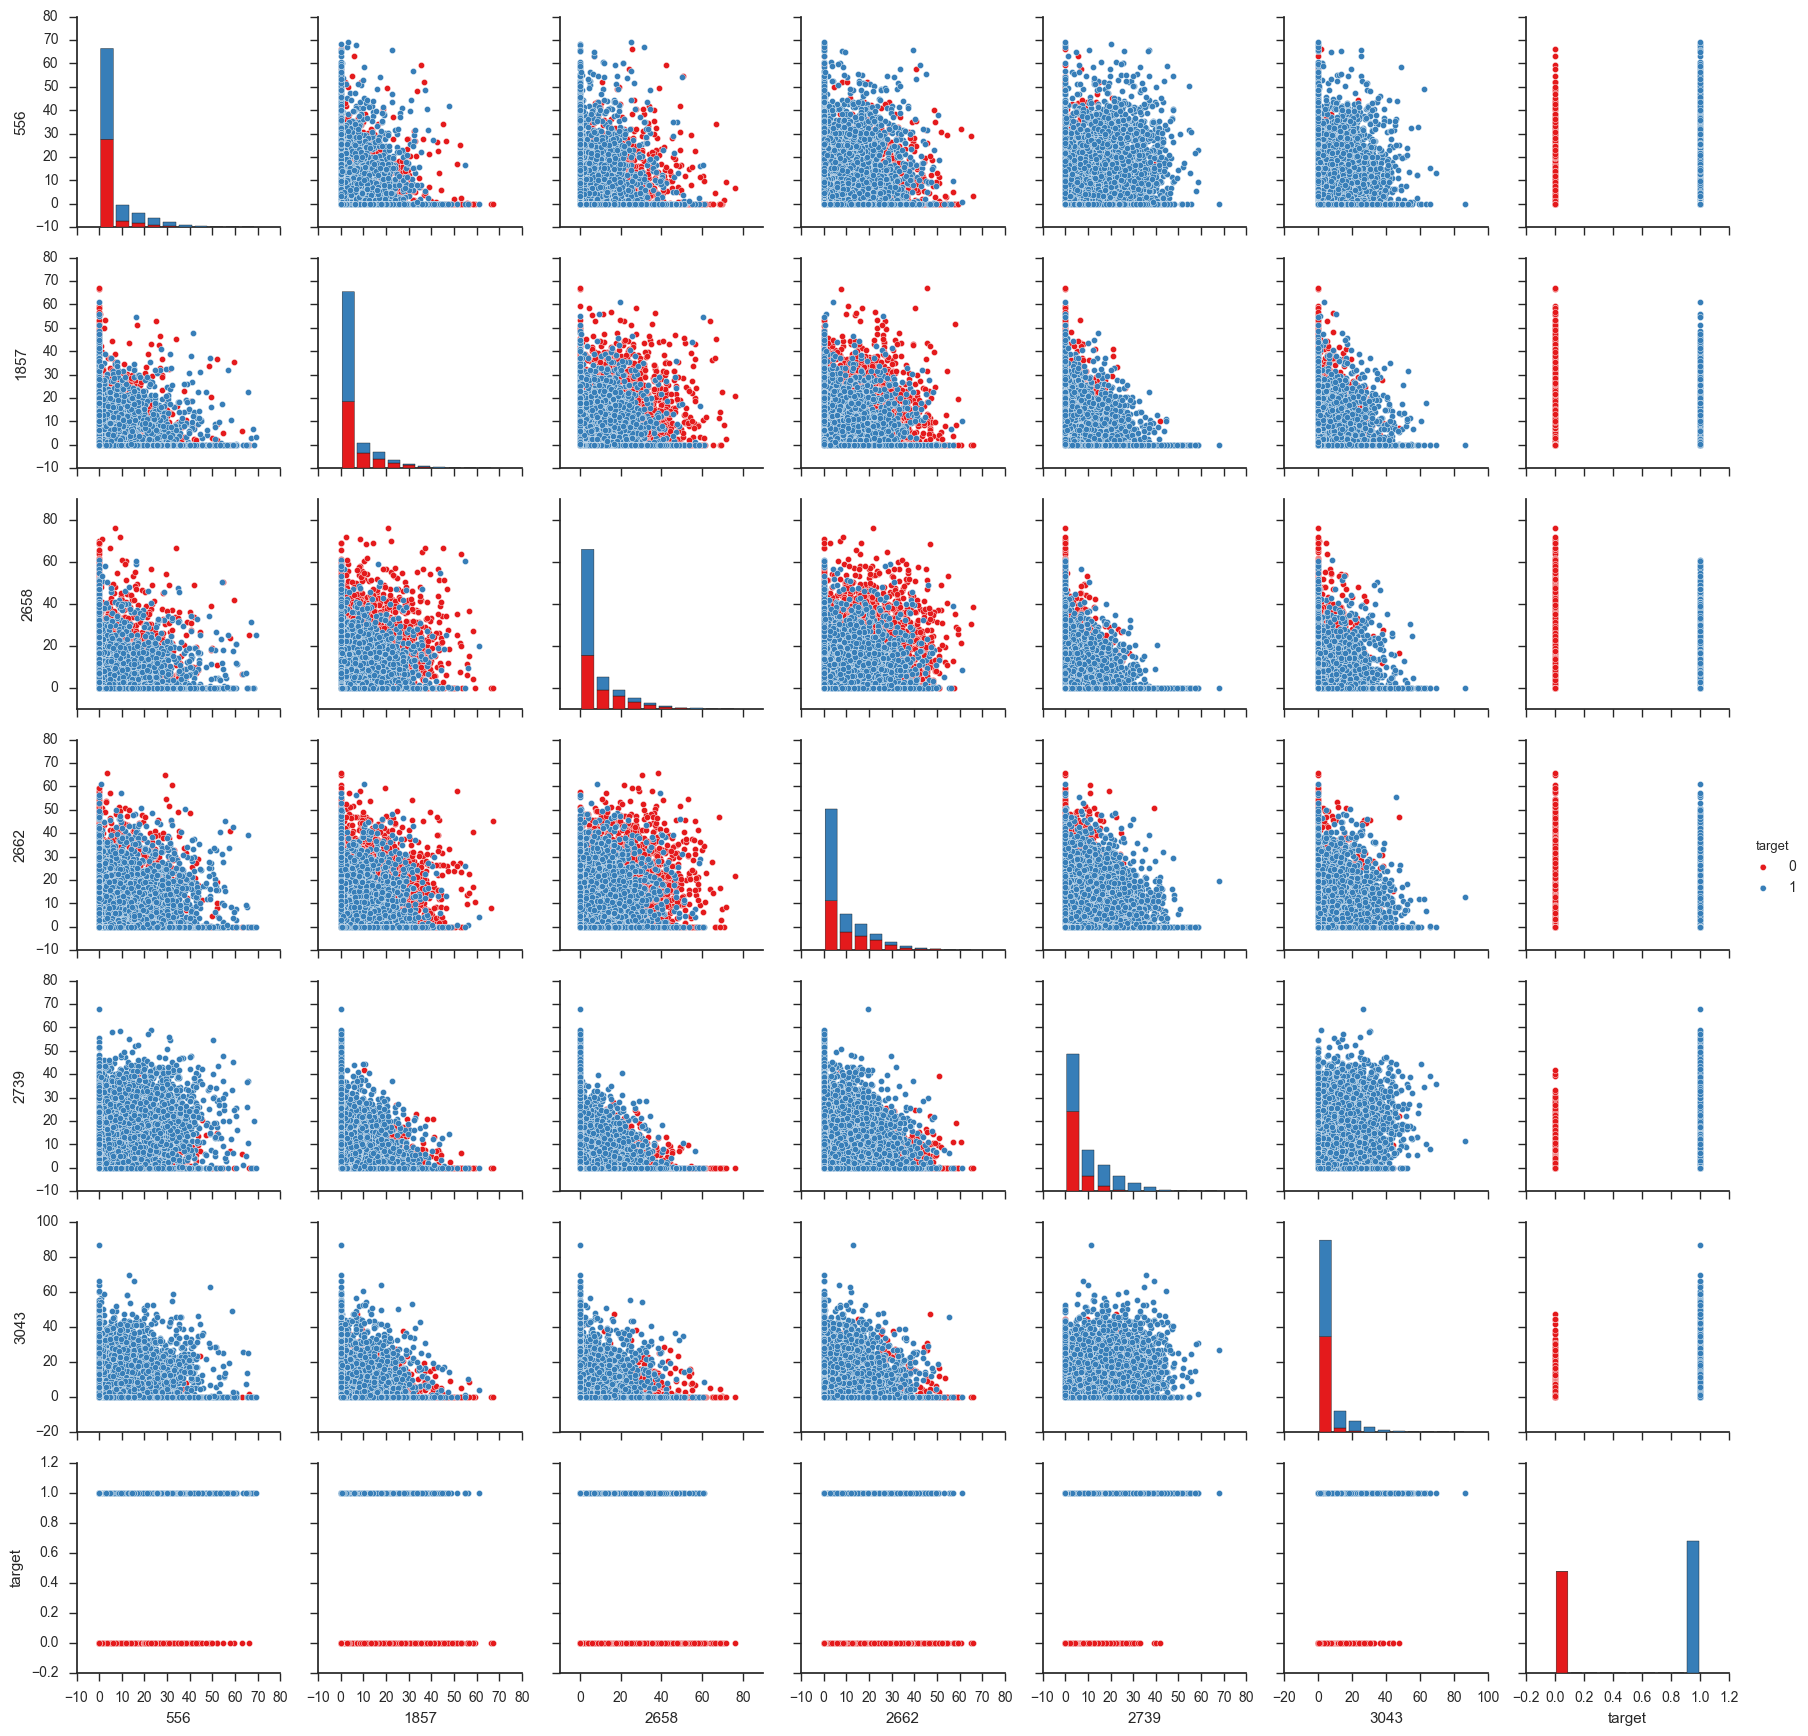

In [8]:
#print 'By using ExtraTreesClassifier, how are good features found ?'
#print 'Is this dataset clearly separable ? '

from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
X_train = data.drop('target', axis=1).values   
y_train = data['target'].values

goodFeatures = []

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

features = model.feature_importances_

featuresThreshold = 20 #This threshold modifies number of good features. #Ce seuil modifie le nombre de variables acceptées
for feature in range(len(features)):
    if(features[feature] > np.mean(features)*featuresThreshold):
        goodFeatures.append(feature)
        
print 'Top '+ str(len(goodFeatures))+ ' of Good Features: ' + str(goodFeatures)

sns.set(style="ticks", color_codes=True)
sns.pairplot(data[data.columns[goodFeatures + [4096]]], hue='target', palette="Set1")


Feature ranking:
1. feature 2739 (0.005148)
2. feature 880 (0.004518)
3. feature 2067 (0.003703)
4. feature 2658 (0.003254)
5. feature 427 (0.003067)
6. feature 2147 (0.002863)
7. feature 3017 (0.002798)
8. feature 2106 (0.002735)
9. feature 460 (0.002443)
10. feature 749 (0.002235)
11. feature 827 (0.002216)
12. feature 1353 (0.002207)
13. feature 3043 (0.002163)
14. feature 2737 (0.002144)
15. feature 2005 (0.002085)
16. feature 1238 (0.002062)
17. feature 3770 (0.002029)
18. feature 3313 (0.002009)
19. feature 3228 (0.002001)
20. feature 3657 (0.001943)
21. feature 281 (0.001831)
22. feature 1065 (0.001829)
23. feature 264 (0.001828)
24. feature 1897 (0.001808)
25. feature 1132 (0.001782)
26. feature 2662 (0.001767)
27. feature 1530 (0.001758)
28. feature 3909 (0.001729)
29. feature 2963 (0.001709)
30. feature 1118 (0.001687)
31. feature 2297 (0.001669)
32. feature 2403 (0.001668)
33. feature 315 (0.001661)
34. feature 1695 (0.001634)
35. feature 339 (0.001615)
36. feature 2163 (0.0

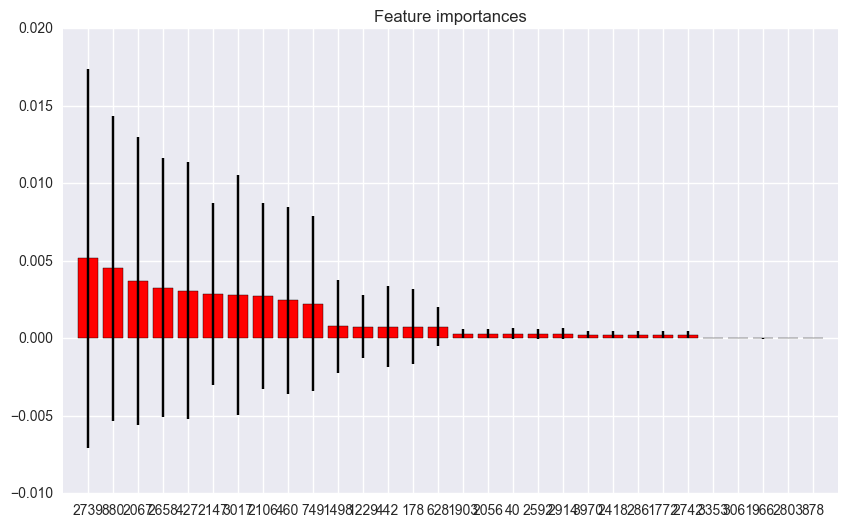

In [5]:
#Représentation graphique de l'importance des variables
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
X_train = data.drop('target', axis=1).values   
y_train = data['target'].values

# Construis une forêt et construis l'importance des variables
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0) #std : standard deviation i.e. ecart type
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

indices = np.concatenate([indices[0:10], indices[150:155], indices[1000:1005], indices[2000:2005], indices[3000:3005]]) 
#print importances
#print importances.shape
#print indices
#print indices.shape

plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(indices.shape[0]), importances[indices],
       color="r", yerr=std[indices], align="center", ecolor="black") 
plt.xticks(range(indices.shape[0]), indices)
plt.xlim([-1, indices.shape[0]])
plt.show()

In [6]:
#Sélection de variables avec l'union de PCA et SelectKBest
#http://scikit-learn.org/stable/auto_examples/feature_stacker.html
#from sklearn.decomposition import PCA
#from sklearn.feature_selection import SelectKBest
#from sklearn.pipeline import Pipeline, FeatureUnion
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#from time import time

#t0 = time()
#pca = PCA()
#selection = SelectKBest()
#combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])
#X_train_features = combined_features.fit(X_train, y_train).transform(X_train)
#rf = RandomForestClassifier(n_estimators=50)
#pipeline = Pipeline([("features", combined_features), ("rf", rf)])
#param_grid = dict(features__pca__n_components=[50, 100],
#                  features__univ_select__k=[50, 100])
#                  #rf__n_estimators=[250, 350])
#grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
#grid_search.fit(X_train, y_train)
#print(grid_search.best_estimator_)
#print(grid_search.best_score_) 
#print(grid_search.best_params_)
#print("done in %0.3fs" % (time() - t0))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
t0 = time()
rf = RandomForestClassifier(n_estimators=20, max_depth=None)
clf = ExtraTreesClassifier()
select = SelectFromModel(clf)
pipeline = Pipeline([("select", select), ("rf", rf)])
param_grid = dict(select__threshold=[0.000001, 0.00001, 0.0001, 0.001, '1.25*mean', '5*mean'])
    
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print(grid_search.best_score_) 
print(grid_search.best_params_)
print("done in %0.3fs" % (time() - t0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] select__threshold=1e-06 .........................................
[CV] .......... select__threshold=1e-06, score=0.771227, total=  16.2s
[CV] select__threshold=1e-06 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s


[CV] .......... select__threshold=1e-06, score=0.765585, total=  14.1s
[CV] select__threshold=1e-06 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.1s remaining:    0.0s


[CV] .......... select__threshold=1e-06, score=0.761918, total=  14.3s
[CV] select__threshold=1e-06 .........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.0s remaining:    0.0s


[CV] .......... select__threshold=1e-06, score=0.767278, total=  14.8s
[CV] select__threshold=1e-06 .........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] .......... select__threshold=1e-06, score=0.765519, total=  14.7s
[CV] select__threshold=1e-05 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV] .......... select__threshold=1e-05, score=0.772355, total=  14.1s
[CV] select__threshold=1e-05 .........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s


[CV] .......... select__threshold=1e-05, score=0.758251, total=  14.7s
[CV] select__threshold=1e-05 .........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.9min remaining:    0.0s


[CV] .......... select__threshold=1e-05, score=0.762764, total=  14.2s
[CV] select__threshold=1e-05 .........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV] .......... select__threshold=1e-05, score=0.777151, total=  13.8s
[CV] select__threshold=1e-05 .........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min remaining:    0.0s


[CV] .......... select__threshold=1e-05, score=0.772009, total=  16.0s
[CV] select__threshold=0.0001 ........................................
[CV] ......... select__threshold=0.0001, score=0.769817, total=  14.4s
[CV] select__threshold=0.0001 ........................................
[CV] ......... select__threshold=0.0001, score=0.759379, total=  14.7s
[CV] select__threshold=0.0001 ........................................
[CV] ......... select__threshold=0.0001, score=0.765585, total=  15.6s
[CV] select__threshold=0.0001 ........................................
[CV] ......... select__threshold=0.0001, score=0.783921, total=  15.7s
[CV] select__threshold=0.0001 ........................................
[CV] ......... select__threshold=0.0001, score=0.764391, total=  14.7s
[CV] select__threshold=0.001 .........................................
[CV] .......... select__threshold=0.001, score=0.783357, total=   6.9s
[CV] select__threshold=0.001 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.6min finished


Pipeline(steps=[('select', SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_lea...imators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
0.770593545475
{'select__threshold': '1.25*mean'}
done in 405.944s


## Building a predictive model

Data matrices for training and making predictions.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(ExtraTreesClassifier(),threshold='1.25*mean')
rf = RandomForestClassifier(n_estimators=200)
pipeline = Pipeline([("select", select), ("rf", rf)])

X_train = data.drop('target', axis=1).values # This is the data matrix you already loaded (training data)
y_train = data['target'].values              # These are the target values encoded as categorical variables
model = pipeline.fit(X_train, y_train)
print 'Dimensions X_train=', X_train.shape, 'y_train=', y_train.shape
X_valid = data_io.read_as_df(basename, 'valid').values #Reading public_data/lothlorian_valid
X_test = data_io.read_as_df(basename, 'test').values #Reading public_data/lothlorian_test
print 'Dimensions X_valid=', X_valid.shape, 'X_test=', X_test.shape

Dimensions X_train= (17724L, 4096L) y_train= (17724L,)
Reading public_data/lothlorian_valid from AutoML format
Number of examples = 13294
Number of features = 4096
Reading public_data/lothlorian_test from AutoML format
Number of examples = 13294
Number of features = 4096
Dimensions X_valid= (13294L, 4096L) X_test= (13294L, 4096L)


The initial classifier in your starting kit (in the sample_code directory).

In [15]:
#http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
#Takes some time to compute (XXXsec)
#from time import time
#from sklearn.ensemble import RandomForestClassifier 
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import GridSearchCV
#t0 = time()

#clf = GradientBoostingClassifier(n_estimators=20)
#param_grid = {"learning_rate": [0.05, 0.1, 0.2], "max_depth": [3, 4, 6]}
#clf = ExtraTreesClassifier(n_estimators=20)
#param_grid = {"max_features": ["auto", None, 12],
#              "min_samples_split": [2, 3, 10],
#              "min_samples_leaf": [5, 7, 10],
#              "bootstrap": [True, False],
#              "max_depth": [3, 4, None]}
#clf = RandomForestClassifier(n_estimators=20)
#param_grid = {"max_depth": [3, None],
#              "max_features": [1, 3, 10],
#              "min_samples_split": [2, 3, 10],
#              "min_samples_leaf": [1, 3, 10],
#              "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}
#grid_search = GridSearchCV(clf, param_grid=param_grid,cv=5,verbose=10)
#grid_search.fit(X_train, y_train)

#print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time() - start, len(grid_search.cv_results_['params'])))
#print(grid_search.cv_results_)
#print(grid_search.best_estimator_)
#print(grid_search.best_score_) 
#print(grid_search.best_params_)
#print("done in %0.3fs" % (time() - t0))

In [18]:
import classifier
reload(classifier)                               # If you make changes to your code you have to reload it
from classifier import Classifier
Classifier??

Train, run, and save your classifier and your predictions. If you saved a trained model and/or prediction results, the evaluation script will look for those and use those in priority [(1) use saved predictions; (2) if no predictions, use saved model, do not retrain, just test; (3) if neither, train and test model from scratch]. Compute the predictions with predict_proba, this is more versatile.

In [37]:
import libscores
from libscores import binarize_predictions 
result_dir = 'res/'
outname = result_dir + dataname
#clf = Classifier()
#clf.fit(X_train, y_train)
#print "ok"

Y_valid = model.predict_proba(X_valid)
Y_test = model.predict_proba(X_test)

Y_valid = binarize_predictions(Y_valid, task='binary.classification') #On peut remettre cette ligne si on remet predict_proba
Y_test = binarize_predictions(Y_test, task='binary.classification') #aux 2 lignes plus haut

clf.save(outname)

#clf.load(outname) # Uncomment to check reloading works
data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
#!ls $outname*

Compute the training accuracy.

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Directly predicts the (categorical) class labels
y_predict = model.predict(X_train)
print 'Training accuracy = ', accuracy_score(y_train, y_predict)
#class_labels = model.get_classes()     
#print 'Class labels=', class_labels

confusion_matrix = confusion_matrix(y_train, y_predict, [0,1])
print 'Confusion matrix [known in lines, predicted in columns]=\n', confusion_matrix

balance_classification_rate = 1/2 * ( float(confusion_matrix[1,1])/float(confusion_matrix[0,1] + confusion_matrix[1,1]) ) + ( float(confusion_matrix[0,0])/float(confusion_matrix[0,0] + confusion_matrix[1,0]))                              
print 'Balance Classification Rate = ', balance_classification_rate


Training accuracy =  0.999492213947
Confusion matrix [known in lines, predicted in columns]=
[[7719    0]
 [   9 9996]]
Balance Classification Rate =  0.998835403727


Compute cross-validation accuracy. This is usually worse than the training accuracy. Notice that we internally split the training data into training and validation set (this is because we do NOT have the labels of X_valid and X_test).

In [39]:
from sklearn.cross_validation import StratifiedShuffleSplit
from time import time
# This is just an example of k-fold cross-validation
t0=time()
skf = StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.5, random_state=61)
i=0
somme=0
for idx_t, idx_v in skf:
    i=i+1
    Xtr = X_train[idx_t]
    Ytr = y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = y_train[idx_v]
    #clf = Classifier()
    model.fit(Xtr, Ytr)
    Y_predict = model.predict(Xva)
    print 'Fold', i, 'validation accuracy = ', accuracy_score(Y_predict, Yva)
    somme += accuracy_score(Y_predict, Yva)
    
print "Moyenne cross-validation = ", somme/5
print("done in %0.3fs" % (time() - t0))

Fold 1 validation accuracy =  0.791130670278
Fold 2 validation accuracy =  0.791469194313
Fold 3 validation accuracy =  0.793951703904
Fold 4 validation accuracy =  0.792823290454
Fold 5 validation accuracy =  0.792259083728
Moyenne cross-validation =  0.792326788535
done in 170.443s


In [20]:
import libscores
 
# We use binary classification!
Y_train, C = libscores.onehot(y_train)                                   
print 'Dimensions Y_train=', Y_train.shape, 'Class labels=', C
assert((class_labels==C).all()) # Just to make sure the labels of the classifier are in the right order
# Note: if all went well, you should recover public_data/lothlorian_train.solution
# You had it all along, but to show you some nice plots we loaded the data as a data frame so we lost it!

from libscores import bac_metric 
from libscores import auc_metric 
from libscores import f1_metric 
from libscores import binarize_predictions 
# Predicts probabilities, a matrix patnum x classnum 
# As solution, you must use Y_train, not y_train
y_predict_proba = clf.predict_proba(X_train)

y_predict = binarize_predictions(y_predict_proba, task='binary.classification')

print 'Training balanced accuracy = ', bac_metric(Y_train, y_predict, task='binary.classification')
print 'Training AUC = ', auc_metric(Y_train, y_predict, task='binary.classification')
print 'Training F1 measure = ', f1_metric(Y_train, y_predict, task='binary.classification')

Dimensions Y_train= (17724L, 2L) Class labels= [0 1]
Training balanced accuracy =  0.776129774211
Training AUC =  0.776129774211
Training F1 measure =  0.776301952845


In [21]:
Classifier??

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>classifier.py</code> in the <code>sample_code/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.  The program looks for saved results and saved models in the subdirectory <code>res/</code>. If it finds them, it will use them: (1) If results are found, then are copied to the output directory; (2) If no results but a trained model is found, it is reloaded and no training occurs; (3) If nothing is found a fresh model is trained and tested.

In [53]:
outdir = 'outputs'         # If you use result_dir as output directory, your submission will include your results

In [ ]:
!python run.py $datadir $outdir

## Making your submission

The test program <code>run.py</code> prepares your <code>zip</code> file, ready to go. You find it in the directory above where you ran your program. For large datasets, we recommend that <b><span style="color:red">you do NOT bundle the data with your submission</span></b>. The data directory is passed as an argument to run.py, and it is already there on the test server.